In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-04-04 09:48:40.620068: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 9

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 28s 765ms/step - accuracy: 0.0781 - loss: 2.4044
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0928 - loss: 2.2953 - val_accuracy: 0.2446 - val_loss: 2.1130
Epoch 2/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.2344 - loss: 2.1248
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2406 - loss: 2.0965 - val_accuracy: 0.3053 - val_loss: 1.9653
Epoch 3/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.2656 - loss: 2.0240
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2911 - loss: 1.9703 - val_accuracy: 0.3560 - val_loss: 1.8056
Epoch 4/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.3438 - loss: 1.8655
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3212 - loss: 1.8412 - val_accuracy: 0.4043 - val_loss: 1.6789
Epoch 5/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.3906 - loss: 1.7143
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3466 - loss: 1.7290 - val_accuracy: 0.4204 - val_loss: 1.5699
Epoch 6/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.3125 - loss: 1.7467
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3538 - loss: 1.6660 - val_accuracy: 0.4427 - val_loss: 1.4928
Epoch 7/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.3516 - loss: 1.7442
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3672 - loss: 1.6281 - val_accuracy: 0.4793 - val_loss: 1.4324
Epoch 8/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.3203 - loss: 1.6680
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3765 - loss: 1.5743 - val_accuracy: 0.5046 - val_loss: 1.3729
Epoch 9/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.3672 - loss: 1.6232
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3908 - loss: 1.5580 - val_accuracy: 0.5808 - val_loss: 1.3150
Epoch 10/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.4219 - loss: 1.4775
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4151 - loss: 1.5050 - val_accuracy: 0.5870 - val_loss: 1.2715
Epoch 11/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.4062 - loss: 1.4716
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4220 - loss: 1.4541 - val_accuracy: 0.6068 - val_loss: 1.2158
Epoch 12/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4531 - loss: 1.3540
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4505 - loss: 1.4099 - val_accuracy: 0.6687 - val_loss: 1.1747
Epoch 13/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.4375 - loss: 1.3421
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4585 - loss: 1.3733 - val_accuracy: 0.6867 - val_loss: 1.1256
Epoch 14/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4609 - loss: 1.3406
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4661 - loss: 1.3625 - val_accuracy: 0.6898 - val_loss: 1.0742
Epoch 15/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.5234 - loss: 1.2494
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4912 - loss: 1.2901 - val_accuracy: 0.6947 - val_loss: 1.0532
Epoch 16/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.4062 - loss: 1.3899
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4847 - loss: 1.3127 - val_accuracy: 0.7022 - val_loss: 1.0017
Epoch 17/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5156 - loss: 1.2400
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5114 - loss: 1.2702 - val_accuracy: 0.7189 - val_loss: 0.9637
Epoch 18/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.4922 - loss: 1.2233
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5182 - loss: 1.2393 - val_accuracy: 0.7337 - val_loss: 0.9314
Epoch 19/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.4922 - loss: 1.2891
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5178 - loss: 1.2280 - val_accuracy: 0.7721 - val_loss: 0.8920
Epoch 20/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5156 - loss: 1.2245
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5303 - loss: 1.1838 - val_accuracy: 0.7944 - val_loss: 0.8543
Epoch 21/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.5781 - loss: 1.1945
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5651 - loss: 1.1470 - val_accuracy: 0.7889 - val_loss: 0.8210
Epoch 22/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.5547 - loss: 1.0980
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5479 - loss: 1.1389 - val_accuracy: 0.7938 - val_loss: 0.8004
Epoch 23/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5312 - loss: 1.1482
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5584 - loss: 1.1295 - val_accuracy: 0.8000 - val_loss: 0.7649
Epoch 24/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6016 - loss: 1.0059
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5788 - loss: 1.1039 - val_accuracy: 0.8019 - val_loss: 0.7416
Epoch 25/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6172 - loss: 0.9719
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5812 - loss: 1.0881 - val_accuracy: 0.8093 - val_loss: 0.7324
Epoch 26/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5625 - loss: 1.0870
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5897 - loss: 1.0606 - val_accuracy: 0.8031 - val_loss: 0.7101
Epoch 27/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6719 - loss: 0.9044
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5942 - loss: 1.0454 - val_accuracy: 0.8105 - val_loss: 0.6925
Epoch 28/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5703 - loss: 1.0543
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5825 - loss: 1.0478 - val_accuracy: 0.8167 - val_loss: 0.6779
Epoch 29/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6172 - loss: 0.9637
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5971 - loss: 1.0394 - val_accuracy: 0.8130 - val_loss: 0.6645
Epoch 30/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.5156 - loss: 1.1027
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5890 - loss: 1.0347 - val_accuracy: 0.8118 - val_loss: 0.6543
Epoch 31/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5938 - loss: 1.0389
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5981 - loss: 1.0222 - val_accuracy: 0.8223 - val_loss: 0.6338
Epoch 32/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5859 - loss: 1.0913
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6089 - loss: 1.0132 - val_accuracy: 0.8248 - val_loss: 0.6179
Epoch 33/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5625 - loss: 1.0533
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6034 - loss: 1.0199 - val_accuracy: 0.8235 - val_loss: 0.6117
Epoch 34/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6406 - loss: 0.9132
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6212 - loss: 0.9678 - val_accuracy: 0.8353 - val_loss: 0.5965
Epoch 35/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6328 - loss: 0.9403
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6191 - loss: 0.9753 - val_accuracy: 0.8303 - val_loss: 0.5795
Epoch 36/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6250 - loss: 0.9649
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6209 - loss: 0.9718 - val_accuracy: 0.8378 - val_loss: 0.5840
Epoch 37/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6328 - loss: 0.9615
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6152 - loss: 0.9792 - val_accuracy: 0.8502 - val_loss: 0.5814
Epoch 38/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6172 - loss: 0.9126
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6202 - loss: 0.9406 - val_accuracy: 0.8520 - val_loss: 0.5613
Epoch 39/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.5781 - loss: 0.9660
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6239 - loss: 0.9771 - val_accuracy: 0.8539 - val_loss: 0.5572
Epoch 40/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6641 - loss: 0.9345
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6298 - loss: 0.9326 - val_accuracy: 0.8539 - val_loss: 0.5592
Epoch 41/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6094 - loss: 0.9266
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6304 - loss: 0.9327 - val_accuracy: 0.8601 - val_loss: 0.5486
Epoch 42/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6719 - loss: 0.9318
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6341 - loss: 0.9471 - val_accuracy: 0.8533 - val_loss: 0.5523
Epoch 43/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6172 - loss: 0.9544
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6267 - loss: 0.9369 - val_accuracy: 0.8607 - val_loss: 0.5400
Epoch 44/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.6406 - loss: 0.8833
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6413 - loss: 0.9235 - val_accuracy: 0.8514 - val_loss: 0.5425
Epoch 45/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6562 - loss: 0.9284
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6430 - loss: 0.9388 - val_accuracy: 0.8594 - val_loss: 0.5321
Epoch 46/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6250 - loss: 0.9255
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6412 - loss: 0.9051 - val_accuracy: 0.8619 - val_loss: 0.5263
Epoch 47/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6797 - loss: 0.9321
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6480 - loss: 0.9034 - val_accuracy: 0.8669 - val_loss: 0.5223
Epoch 48/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.6484 - loss: 0.8744
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6550 - loss: 0.9050 - val_accuracy: 0.8619 - val_loss: 0.5069
Epoch 49/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.5625 - loss: 0.9760
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6303 - loss: 0.9079 - val_accuracy: 0.8638 - val_loss: 0.5150
Epoch 50/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6875 - loss: 0.8214
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6489 - loss: 0.8857 - val_accuracy: 0.8687 - val_loss: 0.5012
Epoch 51/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6406 - loss: 1.0566
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6709 - loss: 0.8981 - val_accuracy: 0.8743 - val_loss: 0.5006
Epoch 52/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6250 - loss: 0.8994
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6461 - loss: 0.8918 - val_accuracy: 0.8768 - val_loss: 0.5016
Epoch 53/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6719 - loss: 0.8342
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6610 - loss: 0.8732 - val_accuracy: 0.8644 - val_loss: 0.4982
Epoch 54/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6641 - loss: 0.8518
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6613 - loss: 0.8833 - val_accuracy: 0.8712 - val_loss: 0.4926
Epoch 55/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6406 - loss: 0.9038
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6601 - loss: 0.8679 - val_accuracy: 0.8724 - val_loss: 0.4964
Epoch 56/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6328 - loss: 0.9096
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6448 - loss: 0.8855 - val_accuracy: 0.8650 - val_loss: 0.4929
Epoch 57/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6406 - loss: 0.9563
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6477 - loss: 0.8950 - val_accuracy: 0.8799 - val_loss: 0.4769
Epoch 58/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5938 - loss: 0.9264
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6474 - loss: 0.8791 - val_accuracy: 0.8762 - val_loss: 0.4778
Epoch 59/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6641 - loss: 0.8018
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6583 - loss: 0.8685 - val_accuracy: 0.8594 - val_loss: 0.4937
Epoch 60/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6875 - loss: 0.8136
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6588 - loss: 0.8710 - val_accuracy: 0.8755 - val_loss: 0.4758
Epoch 61/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6953 - loss: 0.8053
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6735 - loss: 0.8495 - val_accuracy: 0.8718 - val_loss: 0.4687
Epoch 62/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6953 - loss: 0.7943
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6738 - loss: 0.8462 - val_accuracy: 0.8755 - val_loss: 0.4686
Epoch 63/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6719 - loss: 0.7842
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6738 - loss: 0.8413 - val_accuracy: 0.8724 - val_loss: 0.4715
Epoch 64/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6719 - loss: 0.8389
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6669 - loss: 0.8637 - val_accuracy: 0.8724 - val_loss: 0.4623
Epoch 65/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6016 - loss: 0.8906
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6807 - loss: 0.8282 - val_accuracy: 0.8700 - val_loss: 0.4642
Epoch 66/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6094 - loss: 0.8919
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6660 - loss: 0.8503 - val_accuracy: 0.8706 - val_loss: 0.4632
Epoch 67/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6484 - loss: 0.8440
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6541 - loss: 0.8649 - val_accuracy: 0.8873 - val_loss: 0.4508
Epoch 68/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.7344 - loss: 0.9093
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6897 - loss: 0.8367 - val_accuracy: 0.8762 - val_loss: 0.4556
Epoch 69/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6328 - loss: 0.9423
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6769 - loss: 0.8315 - val_accuracy: 0.8854 - val_loss: 0.4506
Epoch 70/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6641 - loss: 0.8656
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6639 - loss: 0.8598 - val_accuracy: 0.8780 - val_loss: 0.4521
Epoch 71/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6719 - loss: 0.8309
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6944 - loss: 0.7976 - val_accuracy: 0.8724 - val_loss: 0.4525
Epoch 72/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6484 - loss: 0.9218
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6684 - loss: 0.8387 - val_accuracy: 0.8842 - val_loss: 0.4416
Epoch 73/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7266 - loss: 0.7759
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6796 - loss: 0.8438 - val_accuracy: 0.8724 - val_loss: 0.4527
Epoch 74/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6875 - loss: 0.7404
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6665 - loss: 0.8437 - val_accuracy: 0.8848 - val_loss: 0.4369
Epoch 75/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5859 - loss: 0.9133
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6691 - loss: 0.8397 - val_accuracy: 0.8836 - val_loss: 0.4373
Epoch 76/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7109 - loss: 0.8508
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6854 - loss: 0.8164 - val_accuracy: 0.8824 - val_loss: 0.4312
Epoch 77/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7266 - loss: 0.7282
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6918 - loss: 0.7971 - val_accuracy: 0.8824 - val_loss: 0.4387
Epoch 78/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7266 - loss: 0.8110
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6812 - loss: 0.8275 - val_accuracy: 0.8830 - val_loss: 0.4357
Epoch 79/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6875 - loss: 0.7400
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6903 - loss: 0.8037 - val_accuracy: 0.8842 - val_loss: 0.4265
Epoch 80/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7031 - loss: 0.8523
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6919 - loss: 0.7988 - val_accuracy: 0.8854 - val_loss: 0.4285
Epoch 81/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7188 - loss: 0.8001
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6909 - loss: 0.8051 - val_accuracy: 0.8854 - val_loss: 0.4341
Epoch 82/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.7109 - loss: 0.6668
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6745 - loss: 0.8170 - val_accuracy: 0.8830 - val_loss: 0.4210
Epoch 83/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6484 - loss: 0.8161
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6736 - loss: 0.8152 - val_accuracy: 0.8811 - val_loss: 0.4316
Epoch 84/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6797 - loss: 0.9543
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6916 - loss: 0.8412 - val_accuracy: 0.8873 - val_loss: 0.4264
Epoch 85/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.7969 - loss: 0.6439
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7014 - loss: 0.7968 - val_accuracy: 0.8774 - val_loss: 0.4365
Epoch 86/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6562 - loss: 0.7706
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6742 - loss: 0.8175 - val_accuracy: 0.8842 - val_loss: 0.4188
Epoch 87/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.7422 - loss: 0.7319
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6939 - loss: 0.7876 - val_accuracy: 0.8817 - val_loss: 0.4263
Epoch 88/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.7734 - loss: 0.7183
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7039 - loss: 0.8001 - val_accuracy: 0.8873 - val_loss: 0.4206
Epoch 89/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7344 - loss: 0.7742
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6917 - loss: 0.8208 - val_accuracy: 0.8762 - val_loss: 0.4332
Epoch 90/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6875 - loss: 0.8245
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6767 - loss: 0.8063 - val_accuracy: 0.8830 - val_loss: 0.4248
Epoch 91/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6875 - loss: 0.7967
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6888 - loss: 0.7943 - val_accuracy: 0.8762 - val_loss: 0.4315
Epoch 92/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7578 - loss: 0.6266
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6999 - loss: 0.7806 - val_accuracy: 0.8830 - val_loss: 0.4263
Epoch 93/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6719 - loss: 0.9576
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6956 - loss: 0.8025 - val_accuracy: 0.8842 - val_loss: 0.4222
Epoch 94/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7031 - loss: 0.8352
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6989 - loss: 0.7831 - val_accuracy: 0.8724 - val_loss: 0.4259
Epoch 95/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6406 - loss: 0.9395
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6858 - loss: 0.8105 - val_accuracy: 0.8842 - val_loss: 0.4160
Epoch 96/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.7266 - loss: 0.8343
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7039 - loss: 0.7989 - val_accuracy: 0.8743 - val_loss: 0.4242
Epoch 97/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7266 - loss: 0.7091
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6932 - loss: 0.7871 - val_accuracy: 0.8793 - val_loss: 0.4279
Epoch 98/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7266 - loss: 0.6982
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6949 - loss: 0.7973 - val_accuracy: 0.8873 - val_loss: 0.4115
Epoch 99/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7266 - loss: 0.6792
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6893 - loss: 0.7861 - val_accuracy: 0.8737 - val_loss: 0.4238
Epoch 100/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6719 - loss: 0.7713
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6878 - loss: 0.7756 - val_accuracy: 0.8743 - val_loss: 0.4243
Epoch 101/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.7422 - loss: 0.6519
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6909 - loss: 0.7816 - val_accuracy: 0.8824 - val_loss: 0.4159
Epoch 102/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6953 - loss: 0.7820
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6861 - loss: 0.7830 - val_accuracy: 0.8774 - val_loss: 0.4170
Epoch 103/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6406 - loss: 0.8574
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6893 - loss: 0.7890 - val_accuracy: 0.8762 - val_loss: 0.4210
Epoch 104/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6484 - loss: 0.9382
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6868 - loss: 0.7907 - val_accuracy: 0.8799 - val_loss: 0.4123
Epoch 105/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6406 - loss: 0.9214
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6844 - loss: 0.7917 - val_accuracy: 0.8718 - val_loss: 0.4185
Epoch 106/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.7266 - loss: 0.8871
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7046 - loss: 0.7853 - val_accuracy: 0.8842 - val_loss: 0.4137
Epoch 107/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6953 - loss: 0.7953
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6989 - loss: 0.7747 - val_accuracy: 0.8824 - val_loss: 0.4081
Epoch 108/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7188 - loss: 0.7091
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.7772 - val_accuracy: 0.8848 - val_loss: 0.4122
Epoch 109/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.7109 - loss: 0.7963
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6992 - loss: 0.7872 - val_accuracy: 0.8830 - val_loss: 0.4018
Epoch 110/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.6797 - loss: 0.7884
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6987 - loss: 0.7532 - val_accuracy: 0.8854 - val_loss: 0.4018
Epoch 111/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6719 - loss: 0.7821
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6891 - loss: 0.7830 - val_accuracy: 0.8842 - val_loss: 0.4023
Epoch 112/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.6250 - loss: 0.8754
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7001 - loss: 0.7767 - val_accuracy: 0.8817 - val_loss: 0.4061
Epoch 113/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7344 - loss: 0.7019
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6981 - loss: 0.7690 - val_accuracy: 0.8724 - val_loss: 0.4215
Epoch 114/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6719 - loss: 0.7993
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6947 - loss: 0.7731 - val_accuracy: 0.8861 - val_loss: 0.4056
Epoch 115/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7344 - loss: 0.7096
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6976 - loss: 0.7787 - val_accuracy: 0.8885 - val_loss: 0.4044
Epoch 116/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7109 - loss: 0.7015
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7090 - loss: 0.7590 - val_accuracy: 0.8947 - val_loss: 0.3958
Epoch 117/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6641 - loss: 0.8862
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6956 - loss: 0.7817 - val_accuracy: 0.8910 - val_loss: 0.4031
Epoch 118/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7656 - loss: 0.6767
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7129 - loss: 0.7326 - val_accuracy: 0.8731 - val_loss: 0.4081
Epoch 119/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7109 - loss: 0.7607
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7049 - loss: 0.7802 - val_accuracy: 0.8836 - val_loss: 0.4000
Epoch 120/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7656 - loss: 0.7128
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7009 - loss: 0.7816 - val_accuracy: 0.8867 - val_loss: 0.3968
Epoch 121/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6562 - loss: 0.8912
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7023 - loss: 0.7723 - val_accuracy: 0.8898 - val_loss: 0.3952
Epoch 122/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7344 - loss: 0.7388
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6925 - loss: 0.7751 - val_accuracy: 0.8867 - val_loss: 0.4034
Epoch 123/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7188 - loss: 0.7301
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7099 - loss: 0.7554 - val_accuracy: 0.8892 - val_loss: 0.3987
Epoch 124/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.7734 - loss: 0.7576
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7172 - loss: 0.7552 - val_accuracy: 0.8947 - val_loss: 0.3965
Epoch 125/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6250 - loss: 0.8803
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6916 - loss: 0.7797 - val_accuracy: 0.8898 - val_loss: 0.3997
Epoch 126/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6484 - loss: 0.8703
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6905 - loss: 0.7644 - val_accuracy: 0.8805 - val_loss: 0.4102
Epoch 127/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6562 - loss: 0.9156
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6761 - loss: 0.7925 - val_accuracy: 0.8743 - val_loss: 0.4061
Epoch 128/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.6875 - loss: 0.8742
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7169 - loss: 0.7613 - val_accuracy: 0.8793 - val_loss: 0.3976
Epoch 129/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7344 - loss: 0.6998
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.7590 - val_accuracy: 0.8836 - val_loss: 0.3919
Epoch 130/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6641 - loss: 0.8679
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6952 - loss: 0.7726 - val_accuracy: 0.8923 - val_loss: 0.3961
Epoch 131/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7266 - loss: 0.7067
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6996 - loss: 0.7486 - val_accuracy: 0.8854 - val_loss: 0.3957
Epoch 132/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6172 - loss: 0.8628
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6976 - loss: 0.7670 - val_accuracy: 0.8836 - val_loss: 0.3987
Epoch 133/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6562 - loss: 0.8113
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7000 - loss: 0.7605 - val_accuracy: 0.8805 - val_loss: 0.4051
Epoch 134/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7344 - loss: 0.7004
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7146 - loss: 0.7390 - val_accuracy: 0.8830 - val_loss: 0.3943
Epoch 135/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7422 - loss: 0.7610
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7073 - loss: 0.7703 - val_accuracy: 0.8817 - val_loss: 0.3982
Epoch 136/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7578 - loss: 0.7347
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7134 - loss: 0.7448 - val_accuracy: 0.8916 - val_loss: 0.3920
Epoch 137/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7188 - loss: 0.7456
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7081 - loss: 0.7425 - val_accuracy: 0.8898 - val_loss: 0.3983
Epoch 138/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7109 - loss: 0.6752
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6957 - loss: 0.7845 - val_accuracy: 0.8916 - val_loss: 0.3942
Epoch 139/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6641 - loss: 0.7852
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7015 - loss: 0.7568 - val_accuracy: 0.8929 - val_loss: 0.3848
Epoch 140/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.7344 - loss: 0.7531
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6985 - loss: 0.7702 - val_accuracy: 0.8786 - val_loss: 0.4034
Epoch 141/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6562 - loss: 0.7850
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6902 - loss: 0.7537 - val_accuracy: 0.8830 - val_loss: 0.4014
Epoch 142/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7578 - loss: 0.6575
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7071 - loss: 0.7535 - val_accuracy: 0.8885 - val_loss: 0.3963
Epoch 143/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7656 - loss: 0.6850
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7076 - loss: 0.7645 - val_accuracy: 0.8817 - val_loss: 0.3953
Epoch 144/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6719 - loss: 0.8599
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6976 - loss: 0.7767 - val_accuracy: 0.8830 - val_loss: 0.3940
Epoch 145/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.6953 - loss: 0.7866
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7028 - loss: 0.7577 - val_accuracy: 0.8867 - val_loss: 0.3968
Epoch 146/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.7734 - loss: 0.5754
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7096 - loss: 0.7310 - val_accuracy: 0.8867 - val_loss: 0.3870
Epoch 147/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7188 - loss: 0.8148
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7215 - loss: 0.7436 - val_accuracy: 0.8854 - val_loss: 0.3919
Epoch 148/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7812 - loss: 0.6179
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7144 - loss: 0.7277 - val_accuracy: 0.8799 - val_loss: 0.3947
Epoch 149/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6797 - loss: 0.7617
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7090 - loss: 0.7677 - val_accuracy: 0.8885 - val_loss: 0.3878
Epoch 150/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6719 - loss: 0.8028
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7170 - loss: 0.7237 - val_accuracy: 0.8848 - val_loss: 0.3938
Epoch 151/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6406 - loss: 0.7797
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6972 - loss: 0.7525 - val_accuracy: 0.8916 - val_loss: 0.3954
Epoch 152/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7031 - loss: 0.7156
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7072 - loss: 0.7406 - val_accuracy: 0.8947 - val_loss: 0.3889
Epoch 153/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.6953 - loss: 0.7802
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.7628 - val_accuracy: 0.8885 - val_loss: 0.3883
Epoch 154/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.7578 - loss: 0.6689
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7107 - loss: 0.7382 - val_accuracy: 0.8885 - val_loss: 0.3877
Epoch 155/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7500 - loss: 0.7065
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7190 - loss: 0.7240 - val_accuracy: 0.8848 - val_loss: 0.3831
Epoch 156/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.7188 - loss: 0.6662
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7149 - loss: 0.7180 - val_accuracy: 0.8916 - val_loss: 0.3870
Epoch 157/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7812 - loss: 0.6302
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7113 - loss: 0.7444 - val_accuracy: 0.8935 - val_loss: 0.3856
Epoch 158/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6953 - loss: 0.7136
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7021 - loss: 0.7383 - val_accuracy: 0.8786 - val_loss: 0.3991
Epoch 159/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7578 - loss: 0.6799
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.7191 - val_accuracy: 0.8898 - val_loss: 0.3775
Epoch 160/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7422 - loss: 0.6818
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7214 - loss: 0.7029 - val_accuracy: 0.8873 - val_loss: 0.3826
Epoch 161/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6797 - loss: 0.7660
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7222 - loss: 0.7082 - val_accuracy: 0.8929 - val_loss: 0.3857
Epoch 162/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6484 - loss: 0.8008
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7143 - loss: 0.7150 - val_accuracy: 0.8830 - val_loss: 0.3829
Epoch 163/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7656 - loss: 0.5979
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7126 - loss: 0.7155 - val_accuracy: 0.8910 - val_loss: 0.3835
Epoch 164/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7031 - loss: 0.7012
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7135 - loss: 0.7231 - val_accuracy: 0.8786 - val_loss: 0.3831
Epoch 165/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6719 - loss: 0.8678
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7105 - loss: 0.7470 - val_accuracy: 0.8954 - val_loss: 0.3828
Epoch 166/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7266 - loss: 0.6588
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7130 - loss: 0.7335 - val_accuracy: 0.8836 - val_loss: 0.3901
Epoch 167/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.7031 - loss: 0.7831
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7021 - loss: 0.7744 - val_accuracy: 0.8848 - val_loss: 0.3840
Epoch 168/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7578 - loss: 0.7015
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7100 - loss: 0.7447 - val_accuracy: 0.8848 - val_loss: 0.3895
Epoch 169/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7812 - loss: 0.6493
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7193 - loss: 0.7204 - val_accuracy: 0.8867 - val_loss: 0.3776
Epoch 170/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6953 - loss: 0.7834
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7045 - loss: 0.7426 - val_accuracy: 0.8873 - val_loss: 0.3767
Epoch 171/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.7812 - loss: 0.6076
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7326 - loss: 0.6915 - val_accuracy: 0.8879 - val_loss: 0.3848
Epoch 172/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.7344 - loss: 0.6404
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7059 - loss: 0.7219 - val_accuracy: 0.8879 - val_loss: 0.3816
Epoch 173/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.7734 - loss: 0.6104
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7192 - loss: 0.7337 - val_accuracy: 0.8892 - val_loss: 0.3765
Epoch 174/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6484 - loss: 0.9961
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6993 - loss: 0.7721 - val_accuracy: 0.8910 - val_loss: 0.3822
Epoch 175/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7188 - loss: 0.7352
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7220 - loss: 0.7234 - val_accuracy: 0.8929 - val_loss: 0.3829
Epoch 176/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6953 - loss: 0.6862
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7110 - loss: 0.7287 - val_accuracy: 0.8916 - val_loss: 0.3794
Epoch 177/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6797 - loss: 0.7090
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.7354 - val_accuracy: 0.8985 - val_loss: 0.3694
Epoch 178/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7109 - loss: 0.7714
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7107 - loss: 0.7368 - val_accuracy: 0.8898 - val_loss: 0.3856
Epoch 179/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7422 - loss: 0.6665
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7225 - loss: 0.7228 - val_accuracy: 0.8861 - val_loss: 0.3912
Epoch 180/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6406 - loss: 0.8400
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7018 - loss: 0.7434 - val_accuracy: 0.8916 - val_loss: 0.3870
Epoch 181/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7734 - loss: 0.6880
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7203 - loss: 0.7426 - val_accuracy: 0.8923 - val_loss: 0.3819
Epoch 182/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6875 - loss: 0.8634
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7154 - loss: 0.7486 - val_accuracy: 0.8879 - val_loss: 0.3817
Epoch 183/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.7031 - loss: 0.6518
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6983 - loss: 0.7322 - val_accuracy: 0.8885 - val_loss: 0.3810
Epoch 184/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7734 - loss: 0.7138
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7242 - loss: 0.7296 - val_accuracy: 0.8768 - val_loss: 0.3825
Epoch 185/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7578 - loss: 0.6861
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7296 - loss: 0.7026 - val_accuracy: 0.8929 - val_loss: 0.3845
Epoch 186/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6953 - loss: 0.8128
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7091 - loss: 0.7354 - val_accuracy: 0.8885 - val_loss: 0.3897
Epoch 187/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7578 - loss: 0.7216
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7254 - loss: 0.7298 - val_accuracy: 0.8848 - val_loss: 0.3864
Epoch 188/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.7578 - loss: 0.6087
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7149 - loss: 0.7290 - val_accuracy: 0.8836 - val_loss: 0.3745
Epoch 189/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7891 - loss: 0.6319
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7273 - loss: 0.7016 - val_accuracy: 0.8935 - val_loss: 0.3810
Epoch 190/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.7188 - loss: 0.7472
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7225 - loss: 0.7173 - val_accuracy: 0.8947 - val_loss: 0.3680
Epoch 191/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7812 - loss: 0.6371
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7276 - loss: 0.7135 - val_accuracy: 0.8873 - val_loss: 0.3857
Epoch 192/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6641 - loss: 0.8161
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7138 - loss: 0.7281 - val_accuracy: 0.8892 - val_loss: 0.3661
Epoch 193/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.7500 - loss: 0.6088
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7222 - loss: 0.7195 - val_accuracy: 0.8941 - val_loss: 0.3753
Epoch 194/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7734 - loss: 0.6618
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7223 - loss: 0.7083 - val_accuracy: 0.8935 - val_loss: 0.3747
Epoch 195/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.7031 - loss: 0.7048
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7113 - loss: 0.7314 - val_accuracy: 0.8954 - val_loss: 0.3731
Epoch 196/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6797 - loss: 0.7587
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7184 - loss: 0.7120 - val_accuracy: 0.8910 - val_loss: 0.3716
Epoch 197/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6953 - loss: 0.7619
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7158 - loss: 0.7438 - val_accuracy: 0.8854 - val_loss: 0.3881
Epoch 198/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7031 - loss: 0.7767
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7249 - loss: 0.7112 - val_accuracy: 0.8947 - val_loss: 0.3704
Epoch 199/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.7344 - loss: 0.6360
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7217 - loss: 0.7156 - val_accuracy: 0.8960 - val_loss: 0.3701
Epoch 200/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7188 - loss: 0.6549
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7135 - loss: 0.7339 - val_accuracy: 0.8978 - val_loss: 0.3704
Epoch 201/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7578 - loss: 0.7050
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7154 - loss: 0.7148 - val_accuracy: 0.8910 - val_loss: 0.3747
Epoch 202/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7500 - loss: 0.7137
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7320 - loss: 0.6960 - val_accuracy: 0.8947 - val_loss: 0.3761
Epoch 203/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7188 - loss: 0.7102
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7090 - loss: 0.7198 - val_accuracy: 0.8805 - val_loss: 0.3795
Epoch 204/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.7109 - loss: 0.7809
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7176 - loss: 0.7400 - val_accuracy: 0.8842 - val_loss: 0.3812
Epoch 205/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7109 - loss: 0.6711
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7189 - loss: 0.7136 - val_accuracy: 0.8916 - val_loss: 0.3758
Epoch 206/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7109 - loss: 0.7698
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7219 - loss: 0.7128 - val_accuracy: 0.8892 - val_loss: 0.3823
Epoch 207/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7109 - loss: 0.9011
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7274 - loss: 0.7170 - val_accuracy: 0.8793 - val_loss: 0.3796
Epoch 208/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7422 - loss: 0.7380
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7141 - loss: 0.7312 - val_accuracy: 0.8916 - val_loss: 0.3873
Epoch 209/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7422 - loss: 0.6804
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7317 - loss: 0.6912 - val_accuracy: 0.8935 - val_loss: 0.3732
Epoch 210/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7266 - loss: 0.6706
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7173 - loss: 0.7116 - val_accuracy: 0.8854 - val_loss: 0.3864
Epoch 211/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7031 - loss: 0.7165
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7220 - loss: 0.7134 - val_accuracy: 0.8836 - val_loss: 0.3800
Epoch 212/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7188 - loss: 0.7895
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7323 - loss: 0.7149 - val_accuracy: 0.8848 - val_loss: 0.3786
Epoch 212: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8953 - loss: 0.3629 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[8.0879796e-01 1.6428520e-01 9.5508033e-03 1.5788455e-02 2.0571266e-10
 3.6282277e-10 6.6379749e-11 2.9775430e-04 1.2798305e-03]
0


# Confusion matrix

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


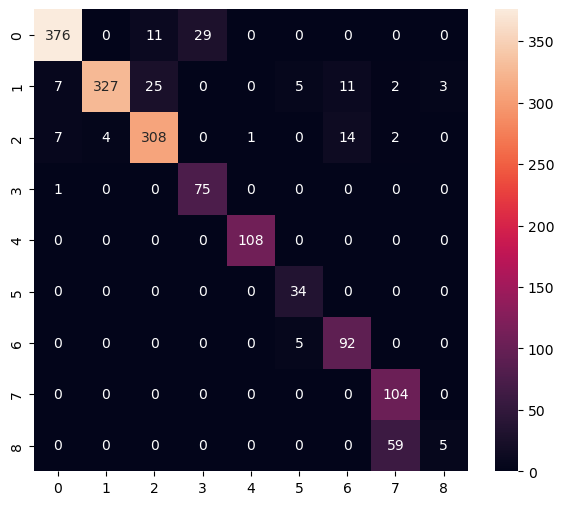

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       416
           1       0.99      0.86      0.92       380
           2       0.90      0.92      0.91       336
           3       0.72      0.99      0.83        76
           4       0.99      1.00      1.00       108
           5       0.77      1.00      0.87        34
           6       0.79      0.95      0.86        97
           7       0.62      1.00      0.77       104
           8       0.62      0.08      0.14        64

    accuracy                           0.88      1615
   macro avg       0.82      0.85      0.80      1615
weighted avg       0.89      0.88      0.88      1615



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpws6tg555/assets


INFO:tensorflow:Assets written to: /tmp/tmpws6tg555/assets


Saved artifact at '/tmp/tmpws6tg555'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  140687298595344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140687298594384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140687298593424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140687298597648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140687298597264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140687298598416: TensorSpec(shape=(), dtype=tf.resource, name=None)


2025-04-04 09:50:04.918489: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpws6tg555
2025-04-04 09:50:04.919009: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-04 09:50:04.919019: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpws6tg555
2025-04-04 09:50:04.959619: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-04 09:50:04.980662: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpws6tg555
2025-04-04 09:50:04.987026: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 68537 microseconds.
2025-04-04 09:50:04.996482: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


6776

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 66 μs, sys: 63 μs, total: 129 μs
Wall time: 128 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.0879784e-01 1.6428532e-01 9.5508220e-03 1.5788460e-02 2.0571339e-10
 3.6282344e-10 6.6379860e-11 2.9775457e-04 1.2798314e-03]
0
